In [1]:
#PR2: DEMONSTRATING LOGISTIC REGRESSION FOR BINARY CLASSIFICATION USING TITANIC DATASET

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')

In [3]:
print("No. of rows and cols:", data.shape)
print("\nColumns:", data.columns)

No. of rows and cols: (891, 12)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.describe() #Statiscal summary of dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#missing values if any
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Filling missing with the mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

#Drop the 'Cabin' column because of high number of missing values
data.drop(columns=['Cabin'], inplace=True)

In [10]:
#There are only 2 missing values for 'Embarked', sp we can replace it with the port where most passenger boarded
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [12]:
#Filling 2 missing values by 'S' as it is where most passengers boarded
data['Embarked'].fillna('S', inplace=True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Embarked                         S
Name: 61, dtype: object

In [15]:
data.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Embarked                                               S
Name: 829, dtype: object

In [16]:
#remove duplicates if any
data = data.drop_duplicates()
print("No. of rows and cols after removing duplicates: ", data.shape)

No. of rows and cols after removing duplicates:  (891, 11)


In [17]:
#drop unnecessary columns
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [18]:
#Convert categorical variables into numerical format using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [19]:
#adjusted dataset
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [20]:
#define features & target variables
x = data.drop(columns=['Survived'])
y = data['Survived']

In [21]:
#splitting data into train and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(712, 8) (179, 8)
(712,) (179,)


In [22]:
#model training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [23]:
#model prediction
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [24]:
#performance measures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.17318435754189945
0.17318435754189945
0.2605277185501065


In [25]:
#model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"ACCURACY: {accuracy}")
print(f"CLASSIFICATION REPORT: \n{report}")

ACCURACY: 0.8268156424581006
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       112
           1       0.82      0.69      0.75        67

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



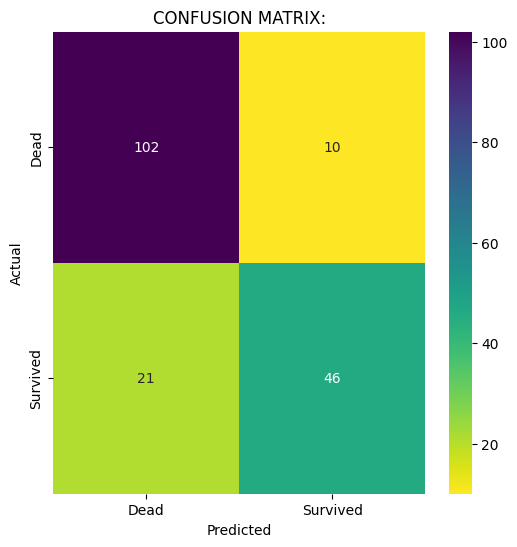

In [26]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis_r', xticklabels=['Dead', 'Survived'], yticklabels=['Dead', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CONFUSION MATRIX:')
plt.show()

In [27]:
#analyzing feature importance
import numpy as np

features = x.columns
coefficient = model.coef_[0]

coeff_df = pd.DataFrame({"Features": features, "Coefficient": coefficient})
coeff_df['Absol_coeff'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Absol_coeff', ascending=False)
coeff_df

,Features,Coefficient,Absol_coeff
5,Sex_male,-2.552928,2.552928
0,Pclass,-1.086472,1.086472
7,Embarked_S,-0.324323,0.324323
2,SibSp,-0.301406,0.301406
3,Parch,-0.054666,0.054666
1,Age,-0.039054,0.039054
6,Embarked_Q,0.023161,0.023161
4,Fare,0.000534,0.000534


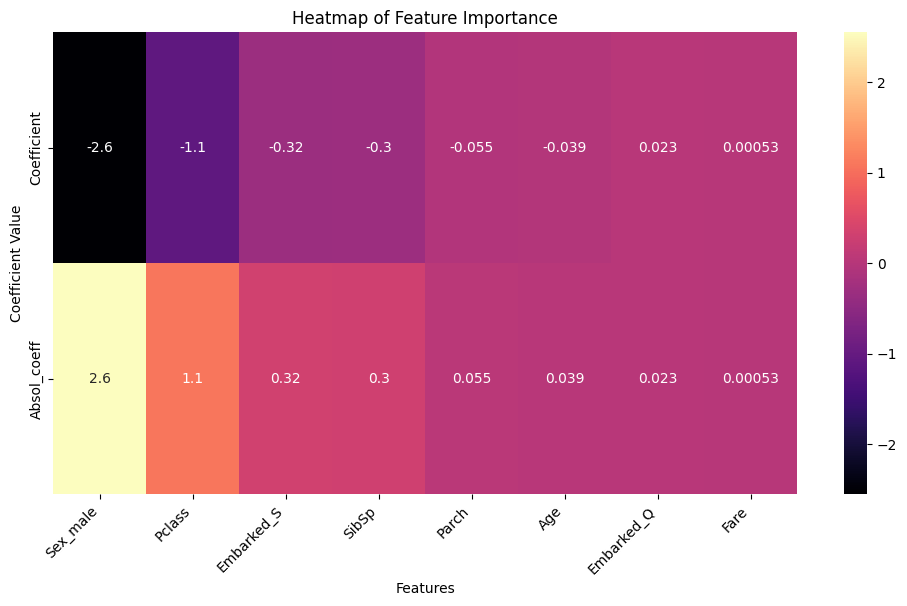

In [28]:
heatmap_data = coeff_df.set_index('Features').T  # Transpose to get features on x-axis

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='magma', center=0, cbar=True)
plt.title('Heatmap of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()